In [2]:
# Graphic tools
import matplotlib.pyplot as plt
import matplotlib

font_params = {'size' : 14}
matplotlib.rc('font', **font_params)

# Source Seeking Tools
import SS_tools.toolbox as sstb
from SS_tools.scalar_field import *

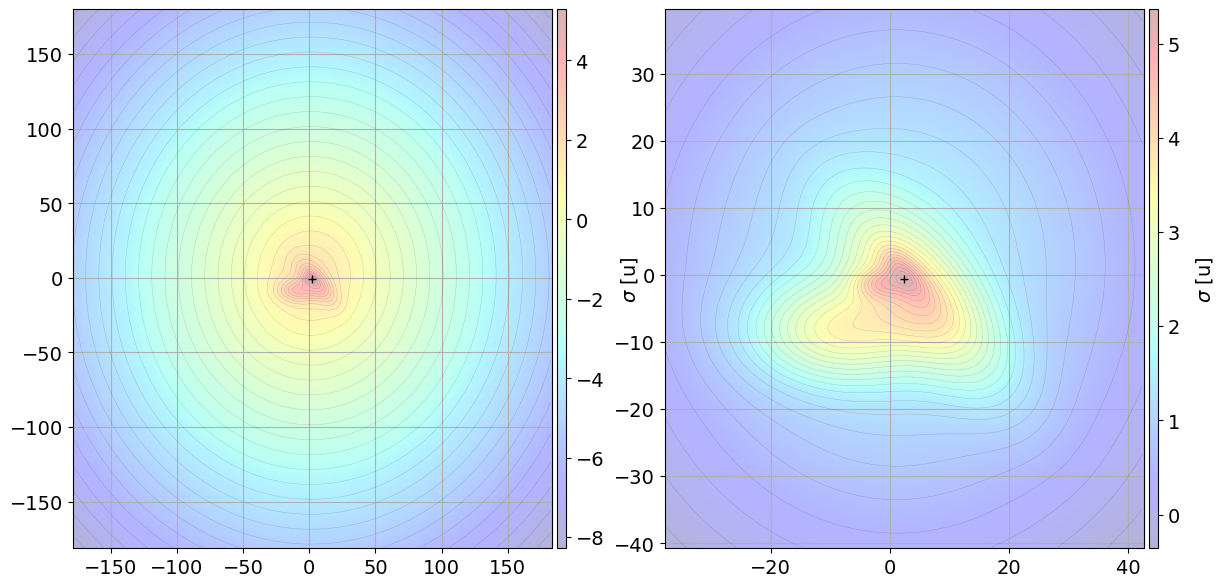

In [2]:
# ----------------------------------------------------------------------
# Testing sigma_fract
# ----------------------------------------------------------------------

psi = 45 * np.pi / 180

# Generate the scalar field
R2 = sstb.M_rot(psi)

sigma_func = sigma_fract(k=0.04, dev=[7,2], mu=[0,0])
sigma_test = sigma(sigma_func)
sigma_test.rot = R2

# Generate the plot
fig = plt.figure(figsize=(7*2, 7), dpi=100)
(ax1, ax2) = fig.subplots(1,2)

# Draw the scalar field
sigma_test.draw(fig=fig, ax=ax1, xlim=180, ylim=180, contour_levels=40)

x = np.linspace(-25,150,10)
y = np.linspace(-50,125,10)

sigma_test.draw(fig=fig, ax=ax2, xlim=40, ylim=40, contour_levels=30)

ax1.grid(True)
ax2.grid(True)
plt.show()

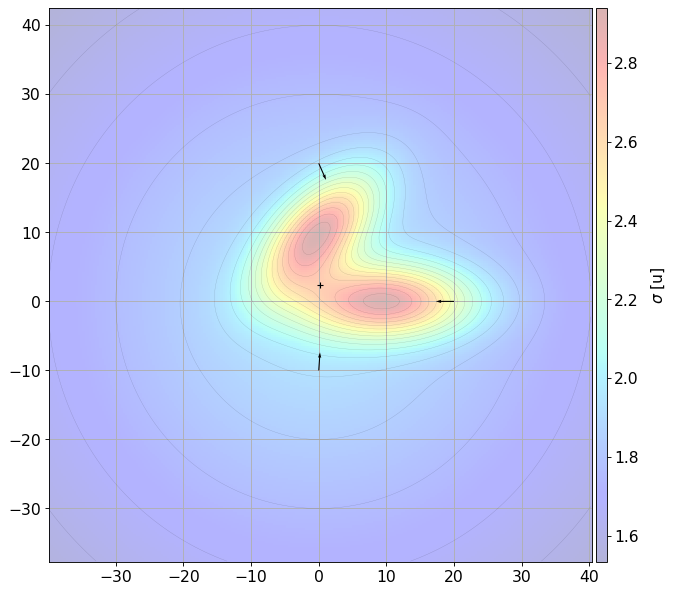

In [5]:
# ----------------------------------------------------------------------
# Testeamos un campo escalar que no nos sirve
# ----------------------------------------------------------------------

# Generate the scalar field
sigma_func = sigma_nonconvex(k=0.04, dev=5, a=[2,0], b=[0,2])
sigma_test = sigma(sigma_func, [0,0])

# Generate the plot
fig = plt.figure(figsize=(9, 9), dpi=80)
ax = fig.subplots()

# Draw the scalar field
sigma_test.draw(fig=fig, ax=ax, xlim=40, ylim=40, contour_levels=20)
#sigma_test.draw_imshow(fig, ax)

# Draw multiple gradients
sigma_test.draw_grad([0, 20], ax, width=0.002, scale=30)
sigma_test.draw_grad([20, 0], ax, width=0.002, scale=30)
sigma_test.draw_grad([0,-10], ax, width=0.002, scale=30)

ax.grid(True)
plt.show()

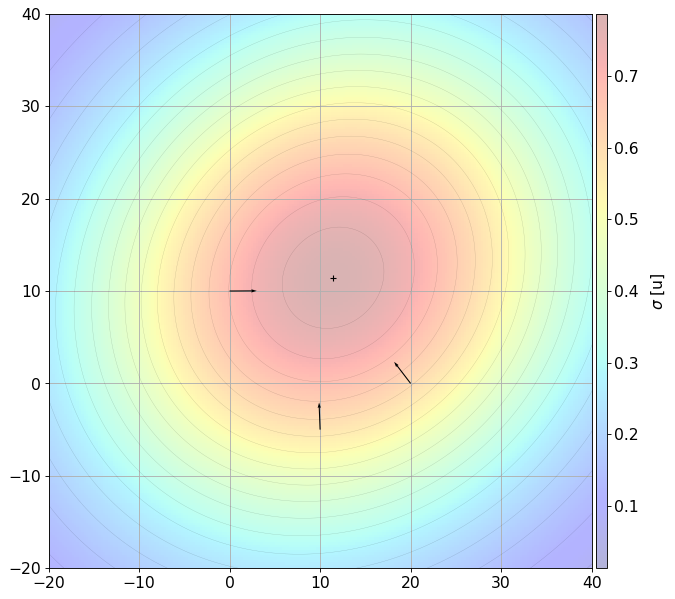

In [4]:
# ----------------------------------------------------------------------
# Testeamos gaussiana
# ----------------------------------------------------------------------

max_int = 100
mu = np.array([10,10]) + 6 * (np.random.rand() - 0.5)
dev = 30 * (np.random.rand() + 1)

psi = np.pi * np.random.rand()
a, b = 1 + 3*(np.random.rand()+1), 1 + 3*(np.random.rand()+1)

# Generate the scalar field
S = -np.array([[a,0],[0,b]])
R =  M_rot(psi)
R2 = M_rot(psi)

sigma_func = sigma_gauss(mu=mu, max_intensity=max_int, dev=dev, S=S, R=R)
sigma_test = sigma(sigma_func)
sigma_test.rot = R2

# Generate the plot
fig = plt.figure(figsize=(9, 9), dpi=80)
ax = fig.subplots()

# Draw the scalar field
sigma_test.draw(fig=fig, ax=ax, xlim=40, ylim=40, n=300, contour_levels=20)
ax.set_xlim([-20,40])
ax.set_ylim([-20,40])

# Draw multiple gradients
sigma_test.draw_grad([0,10], ax, width=0.002, scale=20)
sigma_test.draw_grad([20,0], ax, width=0.002, scale=20)
sigma_test.draw_grad([10,-5], ax, width=0.002, scale=20)

ax.grid(True)
plt.show()

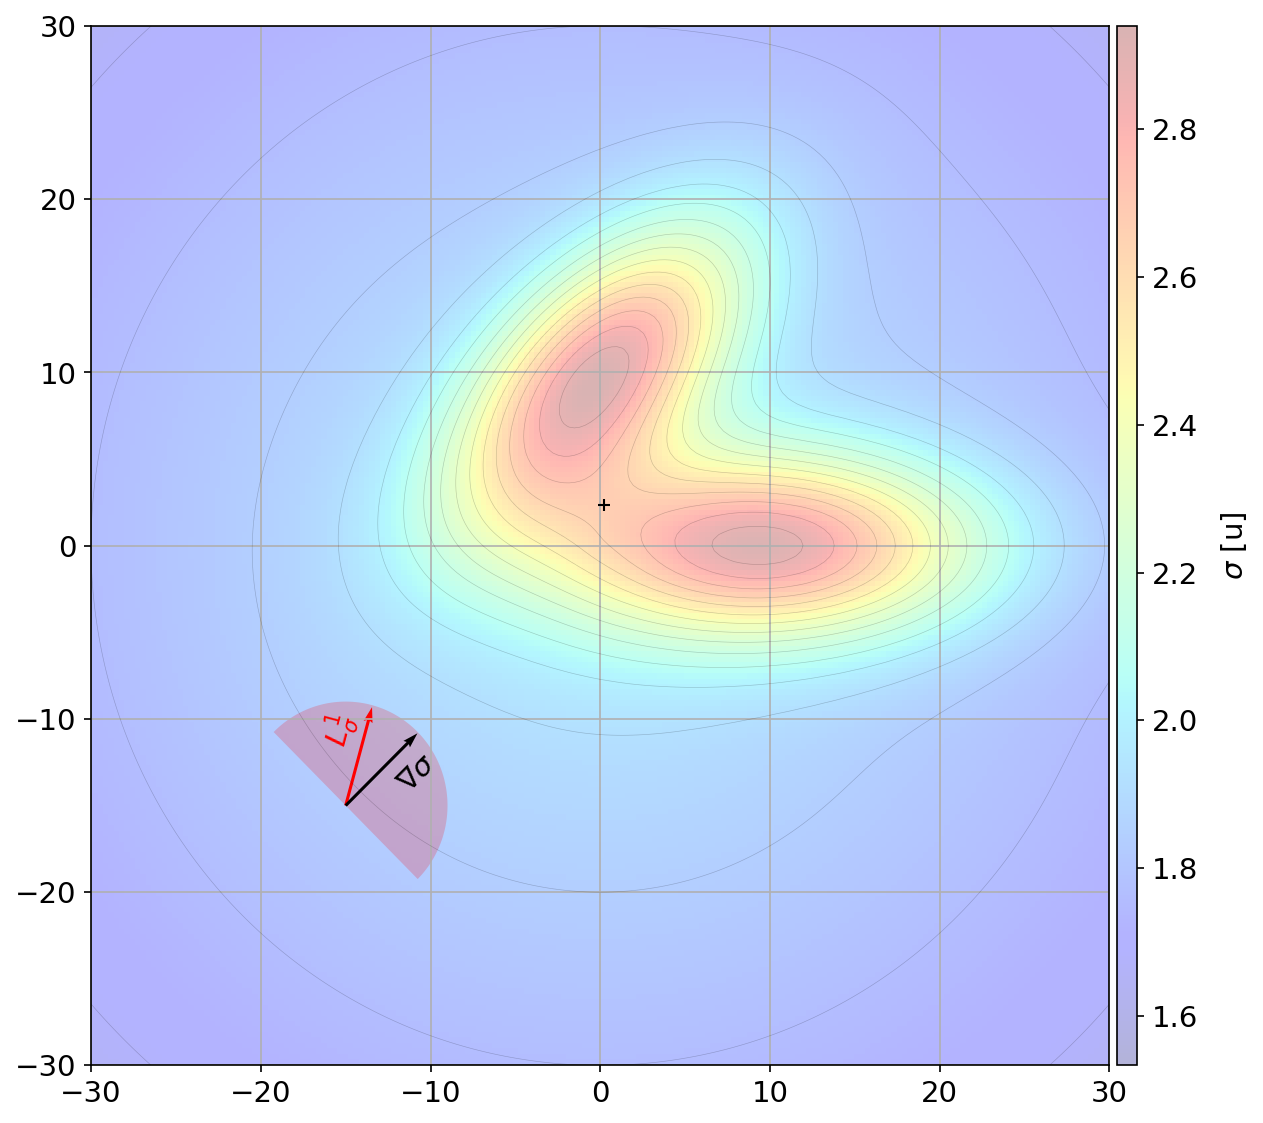

In [51]:
xy_arr = [-15,-15]
r_arc = 6

# Generate the scalar field
sigma_func = sigma_nonconvex(k=0.04, dev=5, a=[2,0], b=[0,2])
sigma_test = sigma(sigma_func, [0,0])

# Generate the plot
fig = plt.figure(figsize=(9, 9), dpi=150)
ax = fig.subplots()
ax.set_xlim([-30,30])
ax.set_ylim([-30,30])

# Draw the scalar field
sigma_test.draw(fig=fig, ax=ax, xlim=40, ylim=40, contour_levels=20)

# Draw multiple gradients
arr_kw = {"width":0.003, "scale":10}
arr_quiv = sigma_test.draw_grad(xy_arr, ax, **arr_kw)
ax.quiver(xy_arr[0], xy_arr[1], np.cos(np.pi/2.4), np.sin(np.pi/2.4), color="red", **arr_kw)

# Draw the blue shape
t_i = np.arctan2((arr_quiv[1]-xy_arr[1]), (arr_quiv[0]-xy_arr[0]))-np.pi/2
t = np.linspace(t_i, t_i+np.pi, 200)
xr, yr = xy_arr[0] + r_arc*np.cos(t), xy_arr[1] + r_arc*np.sin(t)
ax.fill(xr, yr, c="red", alpha=0.2, lw=0)

# Text
ax.text(xy_arr[0]+2.8, xy_arr[1]+0.8, r"$\nabla\sigma$", fontsize=14, rotation=45)
ax.text(xy_arr[0]-1.7, xy_arr[1]+3.8, r"$L_\sigma^1$", fontsize=14, rotation=180/2.4, color="red")

ax.grid(True)
plt.show()

In [ ]:



# Draw the blue shape
t_i = np.arctan2((obs_xy[1]-rbt_xy[i,1]), (obs_xy[0]-rbt_xy[i,0]))
t = np.linspace(t_i, t_i+np.pi, 200)
xr, yr = rbt_xy[i,0] + r_arc*np.cos(t), rbt_xy[i,1] + r_arc*np.sin(t)
ax.fill(xr, yr, c="blue", alpha=0.2, lw=0)